## **Smoking Drinking Prediction**

**Problem Statement:**  
The goal is to predict smoking and drinking habits based on various health and demographic attributes provided in the dataset. This involves analyzing the relationships between features such as age, gender, physical measurements, and health indicators to determine patterns and build a predictive model for smoking and drinking behavior.

Often when patients are diagnosed with a respiratory problem or health condition, they are reluctant to reveal information regarding their smoking and drinking status, that is, whether they smoke or drink and if so, how frequently. There may be several reasons ranging from fear of dismissal or appearing as someone who is careless about personal health. In any case, this leads to misinformation and difficulty for medical practitioners in providing proper treatment. Therefore, there is a need for accurate knowledge of a patient’s smoking and drinking status without having to rely on the patient’s words for the same. It has been shown that this very information can be predicted based on several measurable body signals such as Blood Pressure, Cholesterol, Urine Proteins, and a few enzymes.

**Smoking Drinking Dataset -->**

#### **Importing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

## **Data Collection & Data Analysis**

In [53]:
dataset = pd.read_csv('smoking_drinking_dataset.csv')

In [54]:
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,87,95,201,76,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,82,101,199,61,117,104,13.8,1,0.8,19,12,25,1,N


In [55]:
dataset.shape

(49999, 24)

In [56]:
dataset.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

#### **Rename Columns for Clarity**

In [57]:
dataset.rename(columns={
    'sex': 'gender',
    'waistline': 'waist_cm',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'sight_left': 'vision_left',
    'sight_right': 'vision_right',
    'SBP': 'systolic_bp',
    'DBP': 'diastolic_bp',
    'BLDS': 'blood_sugar',
    'tot_chole': 'total_cholesterol',
    'HDL_chole': 'hdl_cholesterol',
    'LDL_chole': 'ldl_cholesterol',
    'triglyceride': 'triglycerides',
    'Urine_protein': 'urine_protein',
    'serum_creatinine': 'creatinine',
    'AST': 'liver_ast',
    'ALT': 'liver_alt',
    'gamma_GTP': 'gamma_gtp',
    'SMK_stat_type_cd': 'smoking_status',
    'DRK_YN': 'is_drinker'
}, inplace=True)

In [58]:
dataset.head(3)

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,80,99,193,48,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,82,106,228,55,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,70,98,136,41,74,104,15.8,1,0.9,47,32,68,1,N


#### **Checking Null Values**

In [59]:
print("\nMissing values:\n", dataset.isnull().sum())


Missing values:
 gender               0
age                  0
height_cm            0
weight_kg            0
waist_cm             0
vision_left          0
vision_right         0
hear_left            0
hear_right           0
systolic_bp          0
diastolic_bp         0
blood_sugar          0
total_cholesterol    0
hdl_cholesterol      0
ldl_cholesterol      0
triglycerides        0
hemoglobin           0
urine_protein        0
creatinine           0
SGOT_AST             0
SGOT_ALT             0
gamma_gtp            0
smoking_status       0
is_drinker           0
dtype: int64


#### **Checking Duplicated Values**

In [60]:
dataset[dataset.duplicated()]

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker


#### **Outlier Treatment**

In [61]:
print('waistline: ')
print(dataset['waist_cm'].describe())
print('gamma_GPT: ')
print(dataset['gamma_gtp'].describe())

waistline: 
count    49999.000000
mean        81.222152
std         11.958678
min         35.000000
25%         74.000000
50%         81.000000
75%         87.500000
max        999.000000
Name: waist_cm, dtype: float64
gamma_GPT: 
count    49999.000000
mean        36.765055
std         48.649750
min          2.000000
25%         16.000000
50%         23.000000
75%         39.000000
max        999.000000
Name: gamma_gtp, dtype: float64


In [62]:
# Drop unrealistic values
dataset = dataset[dataset['waist_cm'] < 200]
dataset = dataset[dataset['gamma_gtp'] < 200]

In [63]:
print('waistline: ')
print(dataset['waist_cm'].describe())
print('gamma_GPT: ')
print(dataset['gamma_gtp'].describe())

waistline: 
count    49343.000000
mean        81.103842
std          9.612788
min         35.000000
25%         74.000000
50%         81.000000
75%         87.200000
max        129.000000
Name: waist_cm, dtype: float64
gamma_GPT: 
count    49343.000000
mean        32.800255
std         28.469135
min          2.000000
25%         15.000000
50%         23.000000
75%         38.000000
max        199.000000
Name: gamma_gtp, dtype: float64


#### **Removing Ineffective Columns**

Plotting 1...
Plotting 2...
Plotting 3...
Plotting 4...
Plotting 5...
Plotting 6...
Plotting 7...
Plotting 8...
Plotting 9...
Plotting 10...
Plotting 11...


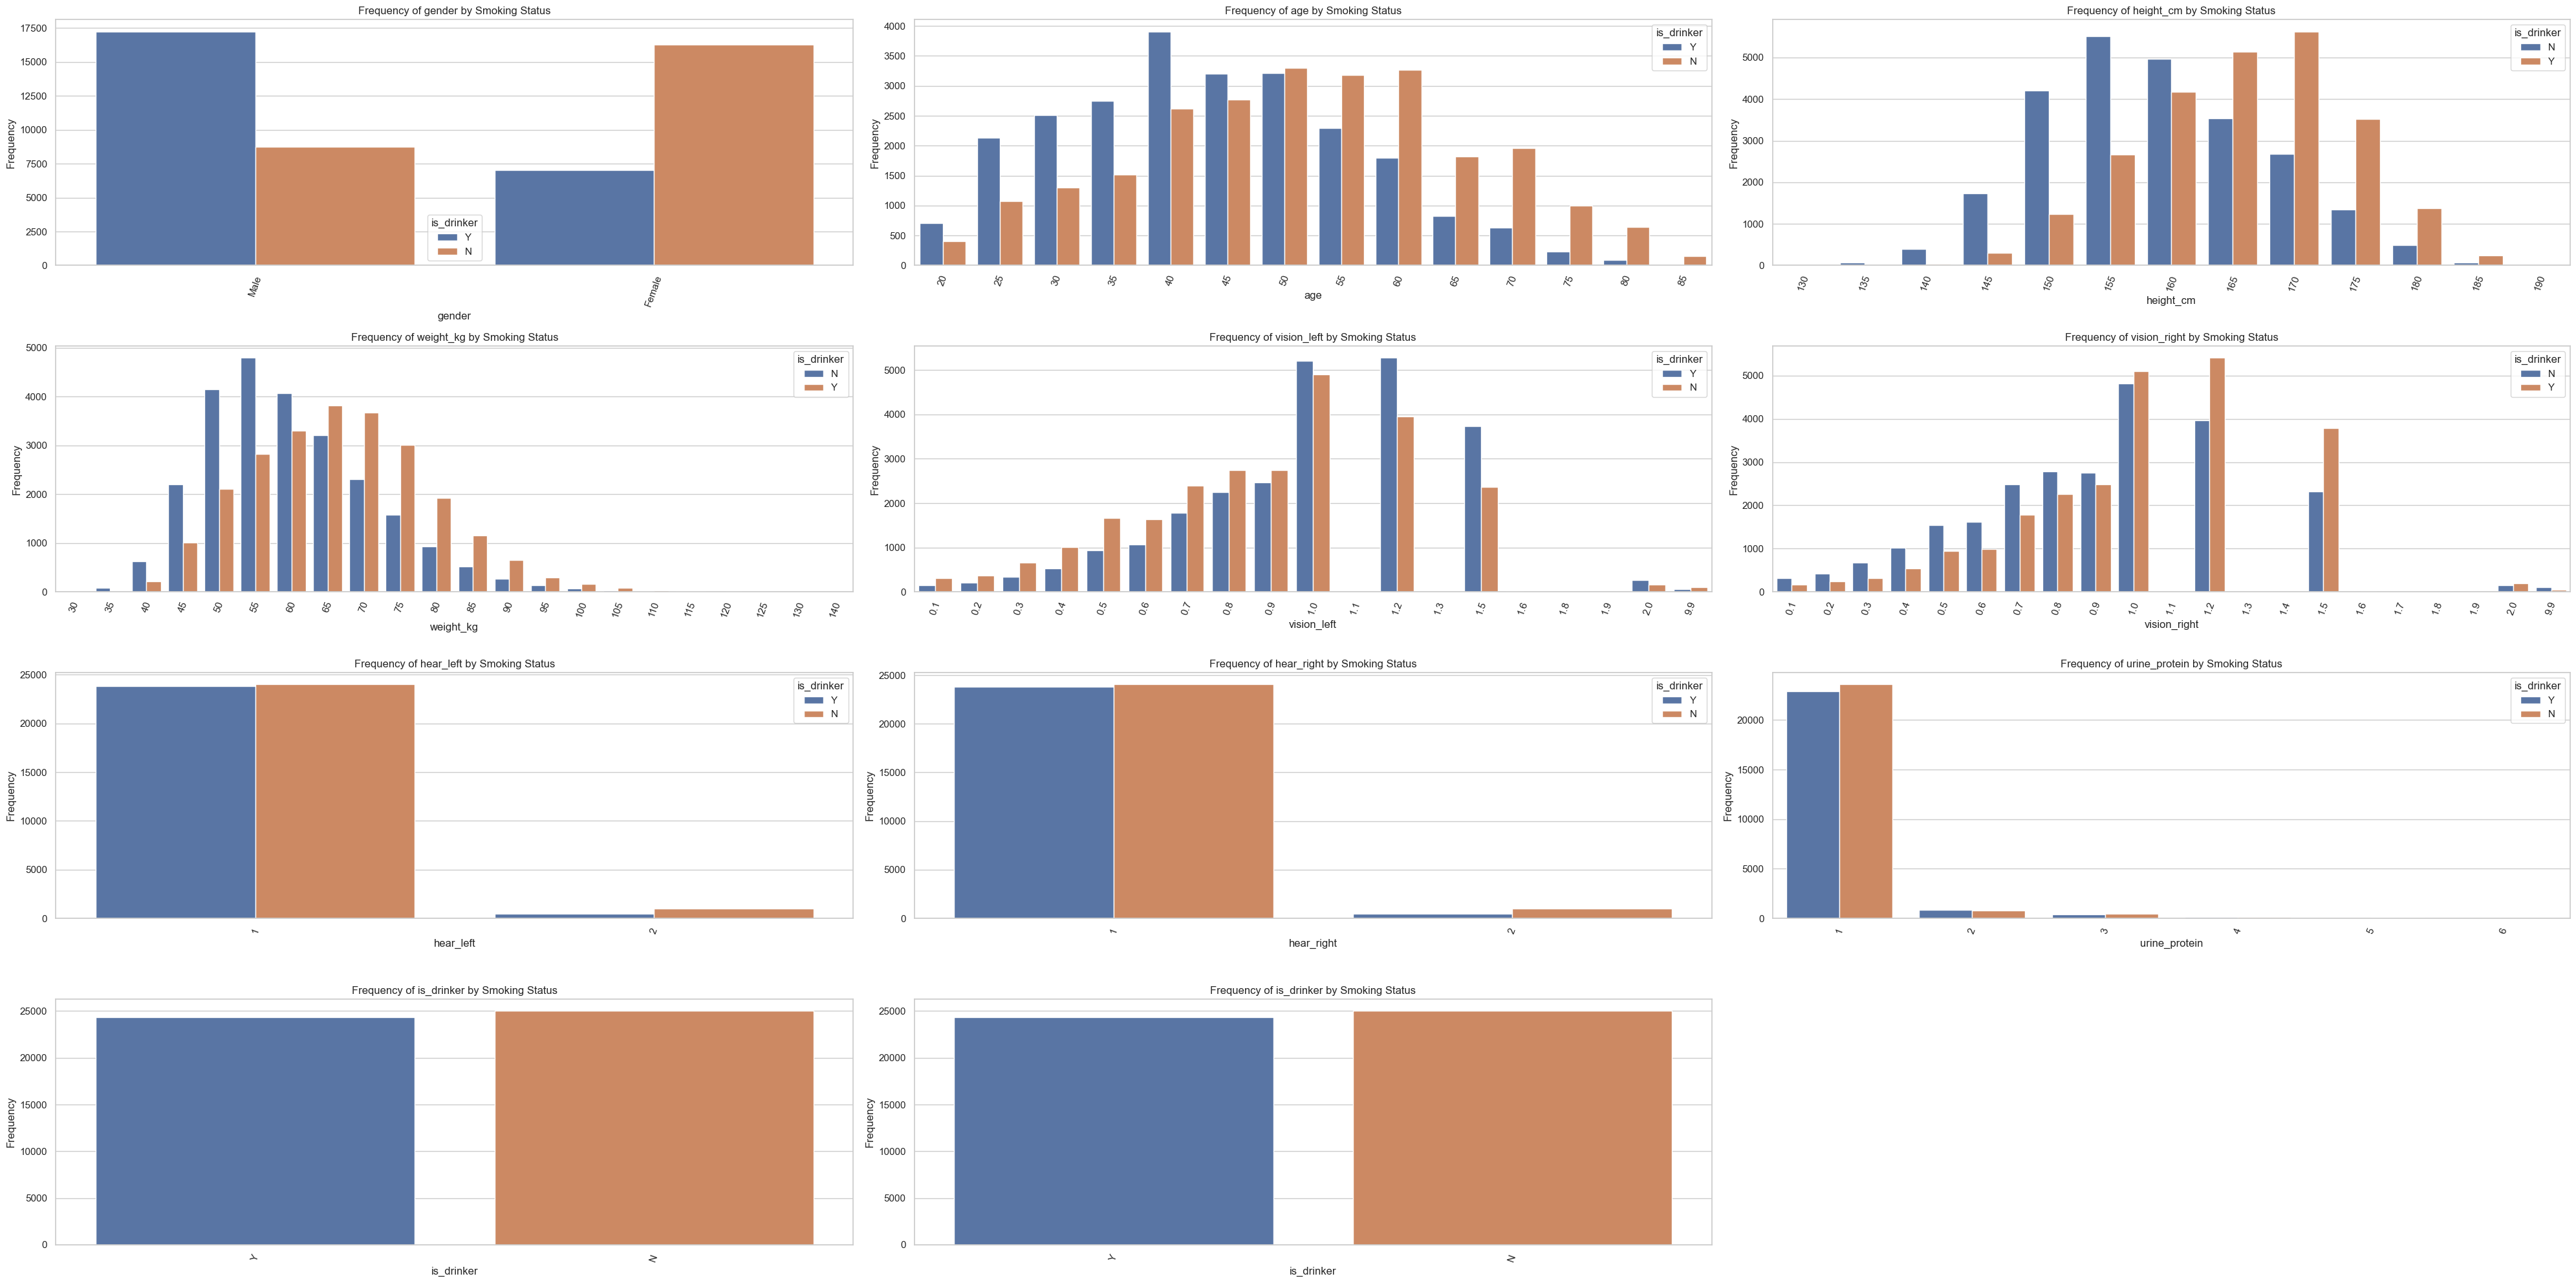

In [ ]:
# current_y_is_smoking_or_drinking = 'smoking_status'
currently_is_smoking_or_drinking = 'is_drinker'

sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

for idx, column in enumerate(['gender', 'age', 'height_cm', 'weight_kg', 'vision_left', 'vision_right', 'hear_left', 'hear_right',
                              "urine_protein", currently_is_smoking_or_drinking, "is_drinker"], start=1):

    plt.subplot(4, 3, idx)

    sns.countplot(x=column, data=dataset , hue=currently_is_smoking_or_drinking)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')

plt.tight_layout()
plt.show()

In [ ]:
dataset.groupby('smoking_status').mean(numeric_only=True)

,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,hear_left,hear_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,urine_protein,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp
smoking_status,,,,,,,,,,,,,,,,,,,,,
1,48.347359,158.520323,59.206859,78.824637,0.950396,0.942060,1.030668,1.030668,121.095995,74.884679,98.451370,195.543075,59.565261,113.814296,114.241518,13.629154,1.088744,0.801713,24.430615,22.571481,25.590208
2,50.139844,167.309147,69.218822,85.186245,1.024507,1.024370,1.041151,1.036222,125.261004,77.998739,103.725126,194.404516,53.746103,112.758597,145.278198,14.957657,1.111646,0.964775,27.470426,29.166094,40.756992
3,43.184747,168.448129,69.562766,84.221525,1.040976,1.050156,1.022738,1.020275,123.412885,77.456656,102.767883,196.224822,52.612411,112.365798,165.446329,15.273567,1.100426,0.935339,26.613074,29.288773,46.760303


In [ ]:
# dataset.drop(['hear_left', 'hear_right', 'urine_protein'], axis=1, inplace=True)

In [ ]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
0,Male,35,170,75,90.0,1.0,1.0,120,80,99,193,48,126,92,17.1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,130,82,106,228,55,148,121,15.8,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,120,70,98,136,41,74,104,15.8,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,145,87,95,201,76,104,106,17.6,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,138,82,101,199,61,117,104,13.8,0.8,19,12,25,1,N


#### **Labelled Encoding**

In [ ]:
label = LabelEncoder()

In [ ]:
dataset['gender'] = label.fit_transform(dataset.gender) # Male - 1, Female - 2

In [ ]:
dataset['is_drinker'] = label.fit_transform(dataset.is_drinker) # Yes - 1, No - 0

In [ ]:
dataset.head()

,gender,age,height_cm,weight_kg,waist_cm,vision_left,vision_right,systolic_bp,diastolic_bp,blood_sugar,total_cholesterol,hdl_cholesterol,ldl_cholesterol,triglycerides,hemoglobin,creatinine,SGOT_AST,SGOT_ALT,gamma_gtp,smoking_status,is_drinker
0,1,35,170,75,90.0,1.0,1.0,120,80,99,193,48,126,92,17.1,1.0,21,35,40,1,1
1,1,30,180,80,89.0,0.9,1.2,130,82,106,228,55,148,121,15.8,0.9,20,36,27,3,0
2,1,40,165,75,91.0,1.2,1.5,120,70,98,136,41,74,104,15.8,0.9,47,32,68,1,0
3,1,50,175,80,91.0,1.5,1.2,145,87,95,201,76,104,106,17.6,1.1,29,34,18,1,0
4,1,50,165,60,80.0,1.0,1.2,138,82,101,199,61,117,104,13.8,0.8,19,12,25,1,0
